In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values



In [117]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        print("X shape",X.shape)
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            print("############## net_input ###########")
            print(net_input.shape)
            print(net_input)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression, we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(X)
            print("y.shape is",y.shape)
            
            errors = (y - output)
            print("errors shape is",errors.shape)
            
            self.w_[1:] += self.eta * X.T.dot(errors)
            print("### self.w_[1:] += self.eta * X.T.dot(errors) ####")
            print(self.eta,"*",X.T,"*",errors)
            
            print ("#### self.w_[0] += self.eta * errors.sum() ####")
            print( self.eta ,"*" ,errors.sum())
            self.w_[0] += self.eta * errors.sum()
            print("Weights are",self.w_)
            cost = (errors**2).sum() / 2.0
            print("Cost is",cost)
            self.cost_.append(cost)
            print("\n \n")
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)


In [118]:

ada1 = AdalineGD(n_iter=10, eta=0.01)
print(AdalineGD(n_iter=10, eta=0.01).fit(X, y))

('X shape', (100L, 2L))
############## net_input ###########
(100L,)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
('y.shape is', (100L,))
('errors shape is', (100L,))
### self.w_[1:] += self.eta * X.T.dot(errors) ####
(0.01, '*', array([[ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
         4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
         4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
         5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
         5.1,  4.8,  5.1,  4.6,  5.3,  5. ,  7. ,  6.4,  6.9,  5.5,  6.5,
         5.7,  6.3,  4.9,  6.6,  5.2, 

In [119]:
print(AdalineGD(n_iter=10, eta=0.01).fit(X, y).predict(X))

('X shape', (100L, 2L))
############## net_input ###########
(100L,)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
('y.shape is', (100L,))
('errors shape is', (100L,))
### self.w_[1:] += self.eta * X.T.dot(errors) ####
(0.01, '*', array([[ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
         4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
         4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
         5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
         5.1,  4.8,  5.1,  4.6,  5.3,  5. ,  7. ,  6.4,  6.9,  5.5,  6.5,
         5.7,  6.3,  4.9,  6.6,  5.2, 

('X shape', (4L, 2L))
############## net_input ###########
(4L,)
[ 0.  0.  0.  0.]
('y.shape is', (4L,))
('errors shape is', (4L,))
### self.w_[1:] += self.eta * X.T.dot(errors) ####
(0.01, '*', array([[ 5.1,  4.9,  4.7,  4.6],
       [ 1.4,  1.4,  1.3,  1.5]]), '*', array([-1., -1., -1., -1.]))
#### self.w_[0] += self.eta * errors.sum() ####
(0.01, '*', -4.0)
('Weights are', array([-0.04 , -0.193, -0.056]))
('Cost is', 2.0)

 

############## net_input ###########
(4L,)
[-1.1027 -1.0641 -1.0199 -1.0118]
('y.shape is', (4L,))
('errors shape is', (4L,))
### self.w_[1:] += self.eta * X.T.dot(errors) ####
(0.01, '*', array([[ 5.1,  4.9,  4.7,  4.6],
       [ 1.4,  1.4,  1.3,  1.5]]), '*', array([ 0.1027,  0.0641,  0.0199,  0.0118]))
#### self.w_[0] += self.eta * errors.sum() ####
(0.01, '*', 0.1984999999999999)
('Weights are', array([-0.038015 , -0.1831433, -0.0532291]))
('Cost is', 0.0075956750000000023)

 

############## net_input ###########
(4L,)
[-1.04656657 -1.00993791 -0.96798634 

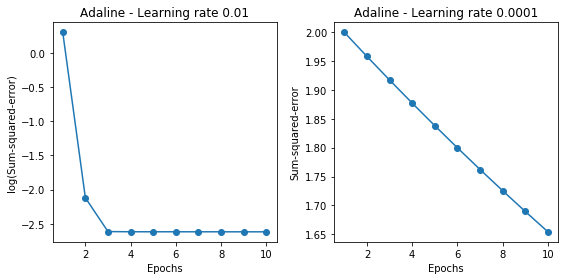

In [115]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
# plt.savefig('./adaline_1.png', dpi=300)
plt.show()

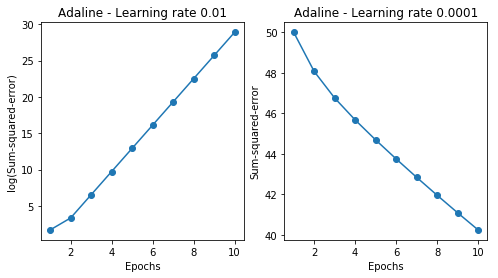

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [68]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
        # setup marker generator and color map
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])
        # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
        print("xx1 is", xx1)
        print("xx1 ravel is", xx1.ravel())
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        print(Z)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        # plot class samples
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)


('xx1 is', array([[-2.8340382, -2.8140382, -2.7940382, ...,  3.3459618,  3.3659618,
         3.3859618],
       [-2.8340382, -2.8140382, -2.7940382, ...,  3.3459618,  3.3659618,
         3.3859618],
       [-2.8340382, -2.8140382, -2.7940382, ...,  3.3459618,  3.3659618,
         3.3859618],
       ..., 
       [-2.8340382, -2.8140382, -2.7940382, ...,  3.3459618,  3.3659618,
         3.3859618],
       [-2.8340382, -2.8140382, -2.7940382, ...,  3.3459618,  3.3659618,
         3.3859618],
       [-2.8340382, -2.8140382, -2.7940382, ...,  3.3459618,  3.3659618,
         3.3859618]]))
('xx1 ravel is', array([-2.8340382, -2.8140382, -2.7940382, ...,  3.3459618,  3.3659618,
        3.3859618]))
[-1 -1 -1 ...,  1  1  1]


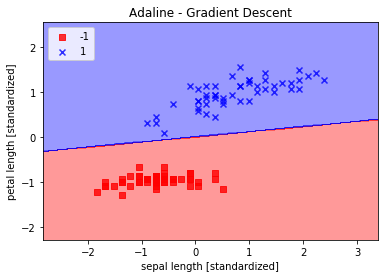

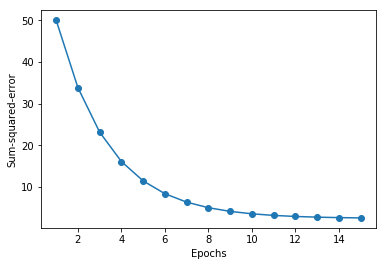

In [76]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
# After standardization, we will train the Adaline again and see that it now converges
# using a learning rate  = 0.01:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()